# Story - Harry Potter and the Sorcerer's Stone

# File - http://www.glozman.com/TextPages/Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt



# Summary of the Social Graph

# Number of characters = 26.
# Number of edges = 166.
# The graph is undirected.
# The density of the social graph is 0.5107692307692308 which indicates that the social graph is moderately connected. There is a substantial number of connections between nodes but not a fully connected graph.
# The average clustering coefficient of the graph is 0.734858078200049 which indicates that the social graph has high level of clustering, confirming the presence of many interconnected groups or communities.
# The diameter of the graph is 3 suggests that the social graph is well-connected and is likely to exhibit the small world property which is very similar to real-world social networks.


In [ ]:
# Required Import Statements
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
!pip install python-louvain
from community import community_louvain
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import girvan_newman

# Make a list of characters in the novel. You need to decide whom to include based
# on who matters. Do not choose a very big novel (Like War and Peace by Tolstoy
# or Mahabharata as there are too many characters) in it as pre-processing will be
# a challenge. Do not choose a novel that has only a minimal number of characters.
# Then, your analysis will not be interesting.

In [ ]:
def preprocess_name(name):
    return name.lower()

In [ ]:
def extract_characters(sentence, character_mapping):
    characters = []
    for alias, canonical_name in character_mapping.items():
        if preprocess_name(alias) in sentence.lower():
            characters.append(preprocess_name(canonical_name))
    return characters

In [ ]:
G = nx.Graph()

In [ ]:
with open('Harry Potter and the Sorcerer\'s Stone.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# b. Extract a social graph of the manually identified characters in the text. To do this,
# you need to use a co-occurrence algorithm (co-occurrence in a single sentence or
# every few sentences – you can decide based on trial and error. If a character has
# multiple names, you have to pre-process that into a single name.). Provide a
# Networkx Visualization of the graph ( no need to use Gephi) .

In [ ]:
character_mapping = {
    'Harry': 'Harry Potter',
    'Potter': 'Harry Potter',
    'Mr. H. Potter': 'Harry Potter',
    'Hermione': 'Hermione Granger',
    'Granger': 'Hermione Granger',
    'Ron': 'Ronald Weasley',
    'Ron Weasley': 'Ronald Weasley',
    'Professor Snape': 'Severus Snape',
    'Severus': 'Severus Snape',
    'Snape': 'Severus Snape',
    'Albus': 'Albus Dumbledore',
    'Dumbledore': 'Albus Dumbledore',
    'Voldemort': 'Voldemort',
    'You-Know-Who': 'Voldemort',
    'Draco': 'Draco Malfoy',
    'Malfoy': 'Draco Malfoy',
    'Hagrid': 'Rubeus Hagrid',
    'Neville': 'Neville Longbottom',
    'Longbottom': 'Neville Longbottom',
    'McGonagall': 'Minerva McGonagall',
    'Professor McGonagall': 'Minerva McGonagall',
    'Vernon': 'Vernon Dursley',
    'Mr. Dursley': 'Vernon Dursley',
    'Petunia': 'Petunia Dursley',
    'Mrs Dursley': 'Petunia Dursley',
    'Dudley': 'Dudley Dursley',
    'Quirrell': 'Quirinus Quirrell',
    'Crabbe': 'Vincent Crabbe',
    'Goyle': 'Gregory Goyle',
    'Fred': 'Fred Weasley',
    'George': 'George Weasley',
    'Percy' : 'Percy Weasley',
    'Ginny' : 'Ginny Weasley',
    'Filch': 'Argus Filch',
    'Mr. Filch': 'Argus Filch',
    'Professor Flitwick': 'Filius Flitwick',
    'Flitwick': 'Filius Flitwick',
    'Professor Sprout': 'Pomona Sprout',
    'Sprout': 'Pomona Sprout',
    'Oliver': 'Oliver Wood',
    'Wood': 'Oliver Wood',
    'Seamus': 'Seamus Finnigan',
    'Finnigan': 'Seamus Finnigan',
    'Dean': 'Dean Thomas',
    'Thomas': 'Dean Thomas'
}



In [ ]:
for sentence in text.split('.'):
    sentence_characters = extract_characters(sentence, character_mapping)
    G.add_edges_from(combinations(sentence_characters, 2))


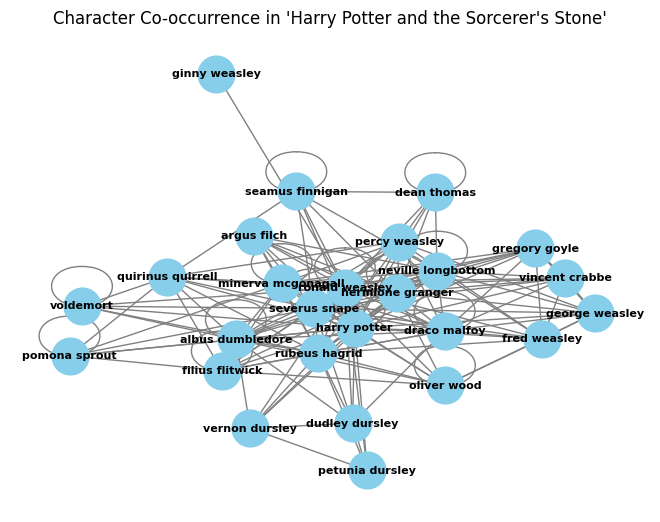

In [ ]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', edge_color='gray')
plt.title("Character Co-occurrence in 'Harry Potter and the Sorcerer's Stone'")
plt.show()

# c. Calculate the four types of centrality of main protagonists, i.e. degree,betweenness, closeness, PageRank.

In [ ]:
#Degree Centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality = pd.DataFrame(list(degree_centrality.items()), columns=['Protagonist', 'Degree Centrality'])
print(degree_centrality)

           Protagonist  Degree Centrality
0         harry potter               1.04
1       dudley dursley               0.32
2      petunia dursley               0.20
3     albus dumbledore               0.72
4   minerva mcgonagall               0.72
5            voldemort               0.32
6        rubeus hagrid               0.72
7       ronald weasley               1.04
8       vernon dursley               0.28
9          oliver wood               0.44
10       gregory goyle               0.40
11   quirinus quirrell               0.48
12        fred weasley               0.44
13      george weasley               0.40
14       percy weasley               0.40
15    hermione granger               0.76
16  neville longbottom               0.72
17      vincent crabbe               0.40
18        draco malfoy               0.72
19     seamus finnigan               0.36
20         dean thomas               0.32
21       severus snape               0.88
22         argus filch            

In [ ]:
#Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = pd.DataFrame(list(betweenness_centrality.items()), columns=['Protagonist', 'Betweenness Centrality'])
print(betweenness_centrality)

           Protagonist  Betweenness Centrality
0         harry potter                0.120579
1       dudley dursley                0.003444
2      petunia dursley                0.000000
3     albus dumbledore                0.028886
4   minerva mcgonagall                0.022652
5            voldemort                0.000000
6        rubeus hagrid                0.048701
7       ronald weasley                0.177357
8       vernon dursley                0.001976
9          oliver wood                0.004142
10       gregory goyle                0.001407
11   quirinus quirrell                0.012212
12        fred weasley                0.005582
13      george weasley                0.003902
14       percy weasley                0.004171
15    hermione granger                0.034898
16  neville longbottom                0.024360
17      vincent crabbe                0.001407
18        draco malfoy                0.019354
19     seamus finnigan                0.001593
20         de

In [ ]:
#Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = pd.DataFrame(list(closeness_centrality.items()), columns=['Protagonist','Closeness Centrality'])
print(closeness_centrality)

           Protagonist  Closeness Centrality
0         harry potter              0.961538
1       dudley dursley              0.595238
2      petunia dursley              0.555556
3     albus dumbledore              0.735294
4   minerva mcgonagall              0.735294
5            voldemort              0.568182
6        rubeus hagrid              0.781250
7       ronald weasley              0.961538
8       vernon dursley              0.581395
9          oliver wood              0.609756
10       gregory goyle              0.625000
11   quirinus quirrell              0.657895
12        fred weasley              0.641026
13      george weasley              0.625000
14       percy weasley              0.625000
15    hermione granger              0.757576
16  neville longbottom              0.735294
17      vincent crabbe              0.625000
18        draco malfoy              0.735294
19     seamus finnigan              0.581395
20         dean thomas              0.568182
21       s

In [ ]:
#Page Rank Centrality
pagerank_centrality = nx.pagerank(G)
pagerank_centrality = pd.DataFrame(list(pagerank_centrality.items()), columns=['Protagonist', 'Page Rank Centrality'])
print(pagerank_centrality)

           Protagonist  Page Rank Centrality
0         harry potter              0.073929
1       dudley dursley              0.027446
2      petunia dursley              0.019460
3     albus dumbledore              0.051227
4   minerva mcgonagall              0.050515
5            voldemort              0.024205
6        rubeus hagrid              0.054753
7       ronald weasley              0.078165
8       vernon dursley              0.024853
9          oliver wood              0.031884
10       gregory goyle              0.031658
11   quirinus quirrell              0.037721
12        fred weasley              0.034596
13      george weasley              0.031966
14       percy weasley              0.031663
15    hermione granger              0.053818
16  neville longbottom              0.050746
17      vincent crabbe              0.031658
18        draco malfoy              0.050513
19     seamus finnigan              0.027039
20         dean thomas              0.024446
21       s

# Extract the Ego network and calculate the local clustering coefficient of the main protagonist nodes.

In [ ]:
local_clustering_coefficients = nx.clustering(G)
local_clustering = pd.DataFrame(list(local_clustering_coefficients.items()), columns=['Protagonist', 'Local Clustering Coefficient'])
print(local_clustering)

           Protagonist  Local Clustering Coefficient
0         harry potter                      0.460145
1       dudley dursley                      0.821429
2      petunia dursley                      1.000000
3     albus dumbledore                      0.625000
4   minerva mcgonagall                      0.666667
5            voldemort                      1.000000
6        rubeus hagrid                      0.549020
7       ronald weasley                      0.442029
8       vernon dursley                      0.857143
9          oliver wood                      0.722222
10       gregory goyle                      0.911111
11   quirinus quirrell                      0.712121
12        fred weasley                      0.763636
13      george weasley                      0.800000
14       percy weasley                      0.800000
15    hermione granger                      0.588235
16  neville longbottom                      0.650000
17      vincent crabbe                      0.

In [ ]:
ego_networks_and_clustering = {}

In [ ]:
for node in G.nodes():
    ego_network = nx.ego_graph(G, node)
    ego_network_size = len(ego_network)
    local_clustering_coefficient = local_clustering_coefficients[node]

    # Store results in the dictionary
    ego_networks_and_clustering[node] = {
        'Ego Network Size': ego_network_size,
        'Local Clustering Coefficient': local_clustering_coefficient
    }

In [ ]:
print(ego_networks_and_clustering)

{'harry potter': {'Ego Network Size': 25, 'Local Clustering Coefficient': 0.4601449275362319}, 'dudley dursley': {'Ego Network Size': 9, 'Local Clustering Coefficient': 0.8214285714285714}, 'petunia dursley': {'Ego Network Size': 6, 'Local Clustering Coefficient': 1.0}, 'albus dumbledore': {'Ego Network Size': 17, 'Local Clustering Coefficient': 0.625}, 'minerva mcgonagall': {'Ego Network Size': 17, 'Local Clustering Coefficient': 0.6666666666666666}, 'voldemort': {'Ego Network Size': 7, 'Local Clustering Coefficient': 1.0}, 'rubeus hagrid': {'Ego Network Size': 19, 'Local Clustering Coefficient': 0.5490196078431373}, 'ronald weasley': {'Ego Network Size': 25, 'Local Clustering Coefficient': 0.4420289855072464}, 'vernon dursley': {'Ego Network Size': 8, 'Local Clustering Coefficient': 0.8571428571428571}, 'oliver wood': {'Ego Network Size': 10, 'Local Clustering Coefficient': 0.7222222222222222}, 'gregory goyle': {'Ego Network Size': 11, 'Local Clustering Coefficient': 0.91111111111111

In [ ]:
ego_network_results=pd.DataFrame.from_dict(ego_networks_and_clustering,orient='index')

In [ ]:
print(ego_network_results)

                    Ego Network Size  Local Clustering Coefficient
harry potter                      25                      0.460145
dudley dursley                     9                      0.821429
petunia dursley                    6                      1.000000
albus dumbledore                  17                      0.625000
minerva mcgonagall                17                      0.666667
voldemort                          7                      1.000000
rubeus hagrid                     19                      0.549020
ronald weasley                    25                      0.442029
vernon dursley                     8                      0.857143
oliver wood                       10                      0.722222
gregory goyle                     11                      0.911111
quirinus quirrell                 13                      0.712121
fred weasley                      12                      0.763636
george weasley                    11                      0.80

# Detect communities using the following methods: Clique Percolation Method,
# Girvan Newman, and Louvain algorithm (Modularity based)

In [ ]:
#Clique Percolation
k = 3
clique_communities = list(k_clique_communities(G, k))
print("Clique Percolation Method Communities:")
for i, community in enumerate(clique_communities):
    print(f"Community {i + 1}: {list(community)}")

Clique Percolation Method Communities:
Community 1: ['fred weasley', 'minerva mcgonagall', 'filius flitwick', 'dudley dursley', 'draco malfoy', 'hermione granger', 'percy weasley', 'gregory goyle', 'ronald weasley', 'oliver wood', 'george weasley', 'harry potter', 'quirinus quirrell', 'voldemort', 'rubeus hagrid', 'neville longbottom', 'argus filch', 'seamus finnigan', 'vernon dursley', 'albus dumbledore', 'dean thomas', 'petunia dursley', 'pomona sprout', 'severus snape', 'vincent crabbe']


In [ ]:
#Girvan Newman
gn_communities = list(girvan_newman(G))
print("Girvan Newman Algorithm Communities:")
for i, community in enumerate(gn_communities):
    print(f"Community {i + 1}: {community}")

Girvan Newman Algorithm Communities:
Community 1: ({'fred weasley', 'hermione granger', 'harry potter', 'vernon dursley', 'neville longbottom', 'argus filch', 'petunia dursley', 'pomona sprout', 'severus snape', 'vincent crabbe', 'minerva mcgonagall', 'dudley dursley', 'filius flitwick', 'draco malfoy', 'percy weasley', 'gregory goyle', 'ronald weasley', 'oliver wood', 'george weasley', 'quirinus quirrell', 'voldemort', 'rubeus hagrid', 'seamus finnigan', 'albus dumbledore', 'dean thomas'}, {'ginny weasley'})
Community 2: ({'fred weasley', 'hermione granger', 'harry potter', 'vernon dursley', 'neville longbottom', 'argus filch', 'pomona sprout', 'severus snape', 'vincent crabbe', 'minerva mcgonagall', 'dudley dursley', 'filius flitwick', 'draco malfoy', 'percy weasley', 'gregory goyle', 'ronald weasley', 'oliver wood', 'george weasley', 'quirinus quirrell', 'voldemort', 'rubeus hagrid', 'seamus finnigan', 'albus dumbledore', 'dean thomas'}, {'petunia dursley'}, {'ginny weasley'})
Commu

In [ ]:
partition = community_louvain.best_partition(G)
louvain_communities = {c: [node for node, part in partition.items() if part == c] for c in set(partition.values())}

print("Louvain Algorithm Communities:")
for i, community in enumerate(louvain_communities.values()):
    print(f"Community {i + 1}: {community}")

Louvain Algorithm Communities:
Community 1: ['harry potter', 'oliver wood', 'fred weasley', 'george weasley', 'percy weasley']
Community 2: ['dudley dursley', 'petunia dursley', 'rubeus hagrid', 'ronald weasley', 'vernon dursley', 'dean thomas', 'ginny weasley']
Community 3: ['albus dumbledore', 'voldemort', 'quirinus quirrell', 'seamus finnigan', 'severus snape', 'pomona sprout', 'filius flitwick']
Community 4: ['minerva mcgonagall', 'gregory goyle', 'hermione granger', 'neville longbottom', 'vincent crabbe', 'draco malfoy', 'argus filch']


# f. Suppose you have a social graph of 50 characters. Create equivalent generative
# models of 50 nodes to compare against the social graph that you extracted (Ref
# Generative models). You should try out Random Graph Model, Preferential
# Attachment and Small world model.

In [ ]:
num_nodes = len(G.nodes)
average_degree = sum(dict(G.degree()).values()) / num_nodes
clustering_coefficient = nx.average_clustering(G)

In [ ]:
random_graph = nx.erdos_renyi_graph(num_nodes, p=average_degree/(num_nodes-1))
preferential_attachment_graph = nx.barabasi_albert_graph(num_nodes, m=int(average_degree/2))
small_world_graph = nx.watts_strogatz_graph(num_nodes, k=int(average_degree), p=clustering_coefficient)

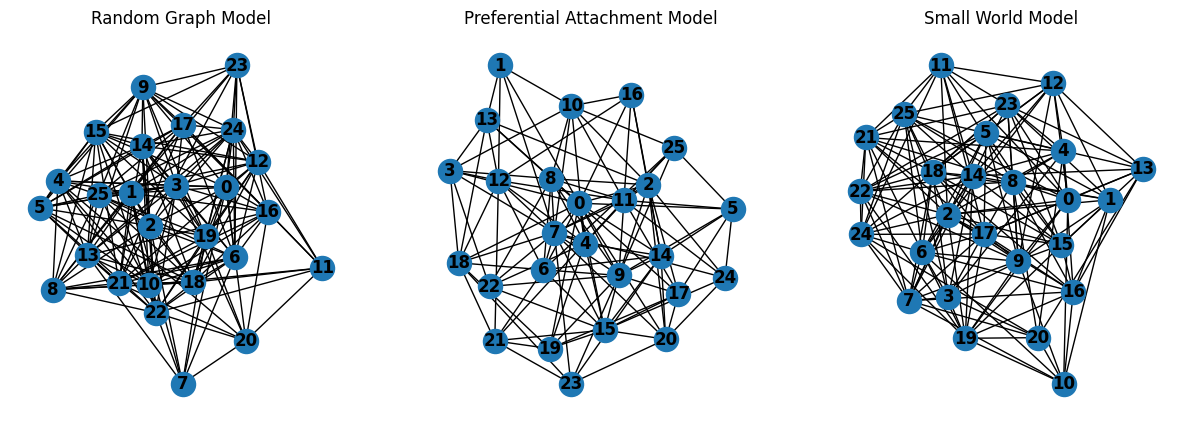

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
nx.draw(random_graph, with_labels=True, font_weight='bold')
plt.title("Random Graph Model")

plt.subplot(132)
nx.draw(preferential_attachment_graph, with_labels=True, font_weight='bold')
plt.title("Preferential Attachment Model")

plt.subplot(133)
nx.draw(small_world_graph, with_labels=True, font_weight='bold')
plt.title("Small World Model")

plt.show()

# ANALYSIS

a.

## As per the analysis, these are the characters with the highest scores in the 4 centrality measures:

# Degree centrality:

# Harry Potter - 1.04, Ronald Weasley - 1.04, Severus Snape - 0.88, Hermione Granger - 0.76

# Betweenness Centrality:

# Ronald Weasley - 0.177357, Harry Potter - 0.120579, Severus Snape - 0.056738, Rubeus Hagrid - 0.048701, Hermione Granger - 0.034898

# Closeness Centrality:

# Harry Potter - 0.961538, Ronald Weasley - 0.961538, Severus Snape - 0.833333, Rubeus Hagrid - 0.781250, Hermione Granger - 0.757576

# PageRank Centrality

# Ronald Weasley - 0.078165, Harry Potter - 0.073929, Severus Snape - 0.061924, Rubeus Hagrid - 0.054753, Hermione Granger - 0.053818

# As seen from the scores, the protagonists of the story are Harry Potter, Ronald Weasley, Severus Snape, Hermione Granger and Rubeus Hagrid.
# This is in accordance with the actual protagonists of the novel 'Harry Potter and the Sorcerer's Stone'. Harry Potter, Ronald Weasley and Hermione Granger are the main protagonists, while Severus Snape and Rubeus Hagrid are prominent characters in the storyline.

## b.

# The social graph extracted from the 'Harry Potter and the Sorcerer's Stone' novel is a fictional representation and does not reflect real-world social interactions. That being said, the extracted social graph does depict certain properties of real world graphs:

# (i) Communities - Many real-world social networks have a community structure, where nodes wihin a community are densely connected. We use several community detection algorithms in the analysis(such as Girvan Newman, Clique Percolation and Louvain) to identify potential communities within the character co-occurence network.

# (ii) Centrality Measures - The calculation of centrality measures such as degree centrality, betweenness centrality, closeness centrality, and PageRank centrality is a common practice in real-world social network analysis. These measures provide insights into the importance and influence of characters within the fictional social context.

# (iii)Ego Networks and Clustering - Ego networks and local clustering coefficients are used to analyze the immediate social environments of individual characters. This mirrors the real-world concept of studying individuals and their immediate social connections.

## c.

# Some of the dynamics in the story depicted by the analysis are:
# For example:
# (i) A community of all the professors in hogwarts is created using the Louvain algortihm: ['albus dumbledore', 'minerva mcgonagall', 'oliver wood', 'quirinus quirrell', 'pomona sprout', 'filius flitwick'] ('oliver wood' is an anomaly in this case since he is not a professor).

# (ii) The character 'Quirinus Quirrell' has an Ego Network Size of 13 and Local Clustering Coefficient of 0.712121 both of which are above average. This means that the character and the neighbours are well connected in the network. This also shows that the character could be influential to the storyline which is in accordance with what is known of the story.

# (iii) A community with students of hogwarts is also depicted: ['gregory goyle', 'fred weasley', 'george weasley', 'percy weasley', 'vincent crabbe', 'draco malfoy', 'severus snape'] ('severus snape' is an anomaly in this case since he is not a student).

# (iv) Harry is sent to live with the Dursleys after his parents are killed by Voldemort. The Louvain algorithm creates a community of these characters: ['harry potter', 'dudley dursley', 'petunia dursley', 'voldemort', 'rubeus hagrid', 'ronald weasley', 'vernon dursley', 'ginny weasley'].


